### 4.2 Prepare the data for modeling

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [78]:
df_products = pd.read_csv('../../data/processed/tiki_data.csv')
df_products.head()

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,Bình giữ nhiệt,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",Nhà Cửa - Đời Sống,96639.0,Parroti Store,Parroti,974.0,12844,799000,429000,46
2,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,Nhà Cửa - Đời Sống,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,1372.0,938,209000,209000,0
3,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,Bình giữ nhiệt,1.0,Tiki Trading,LocknLock,593.0,10359,473000,235000,50
4,115092053,Bộ ga giường poly cotton LIDACO drap giường đ...,Bộ ga,43482.0,Lidaco Official Store,LIDACO,529.0,2338,106000,89000,16


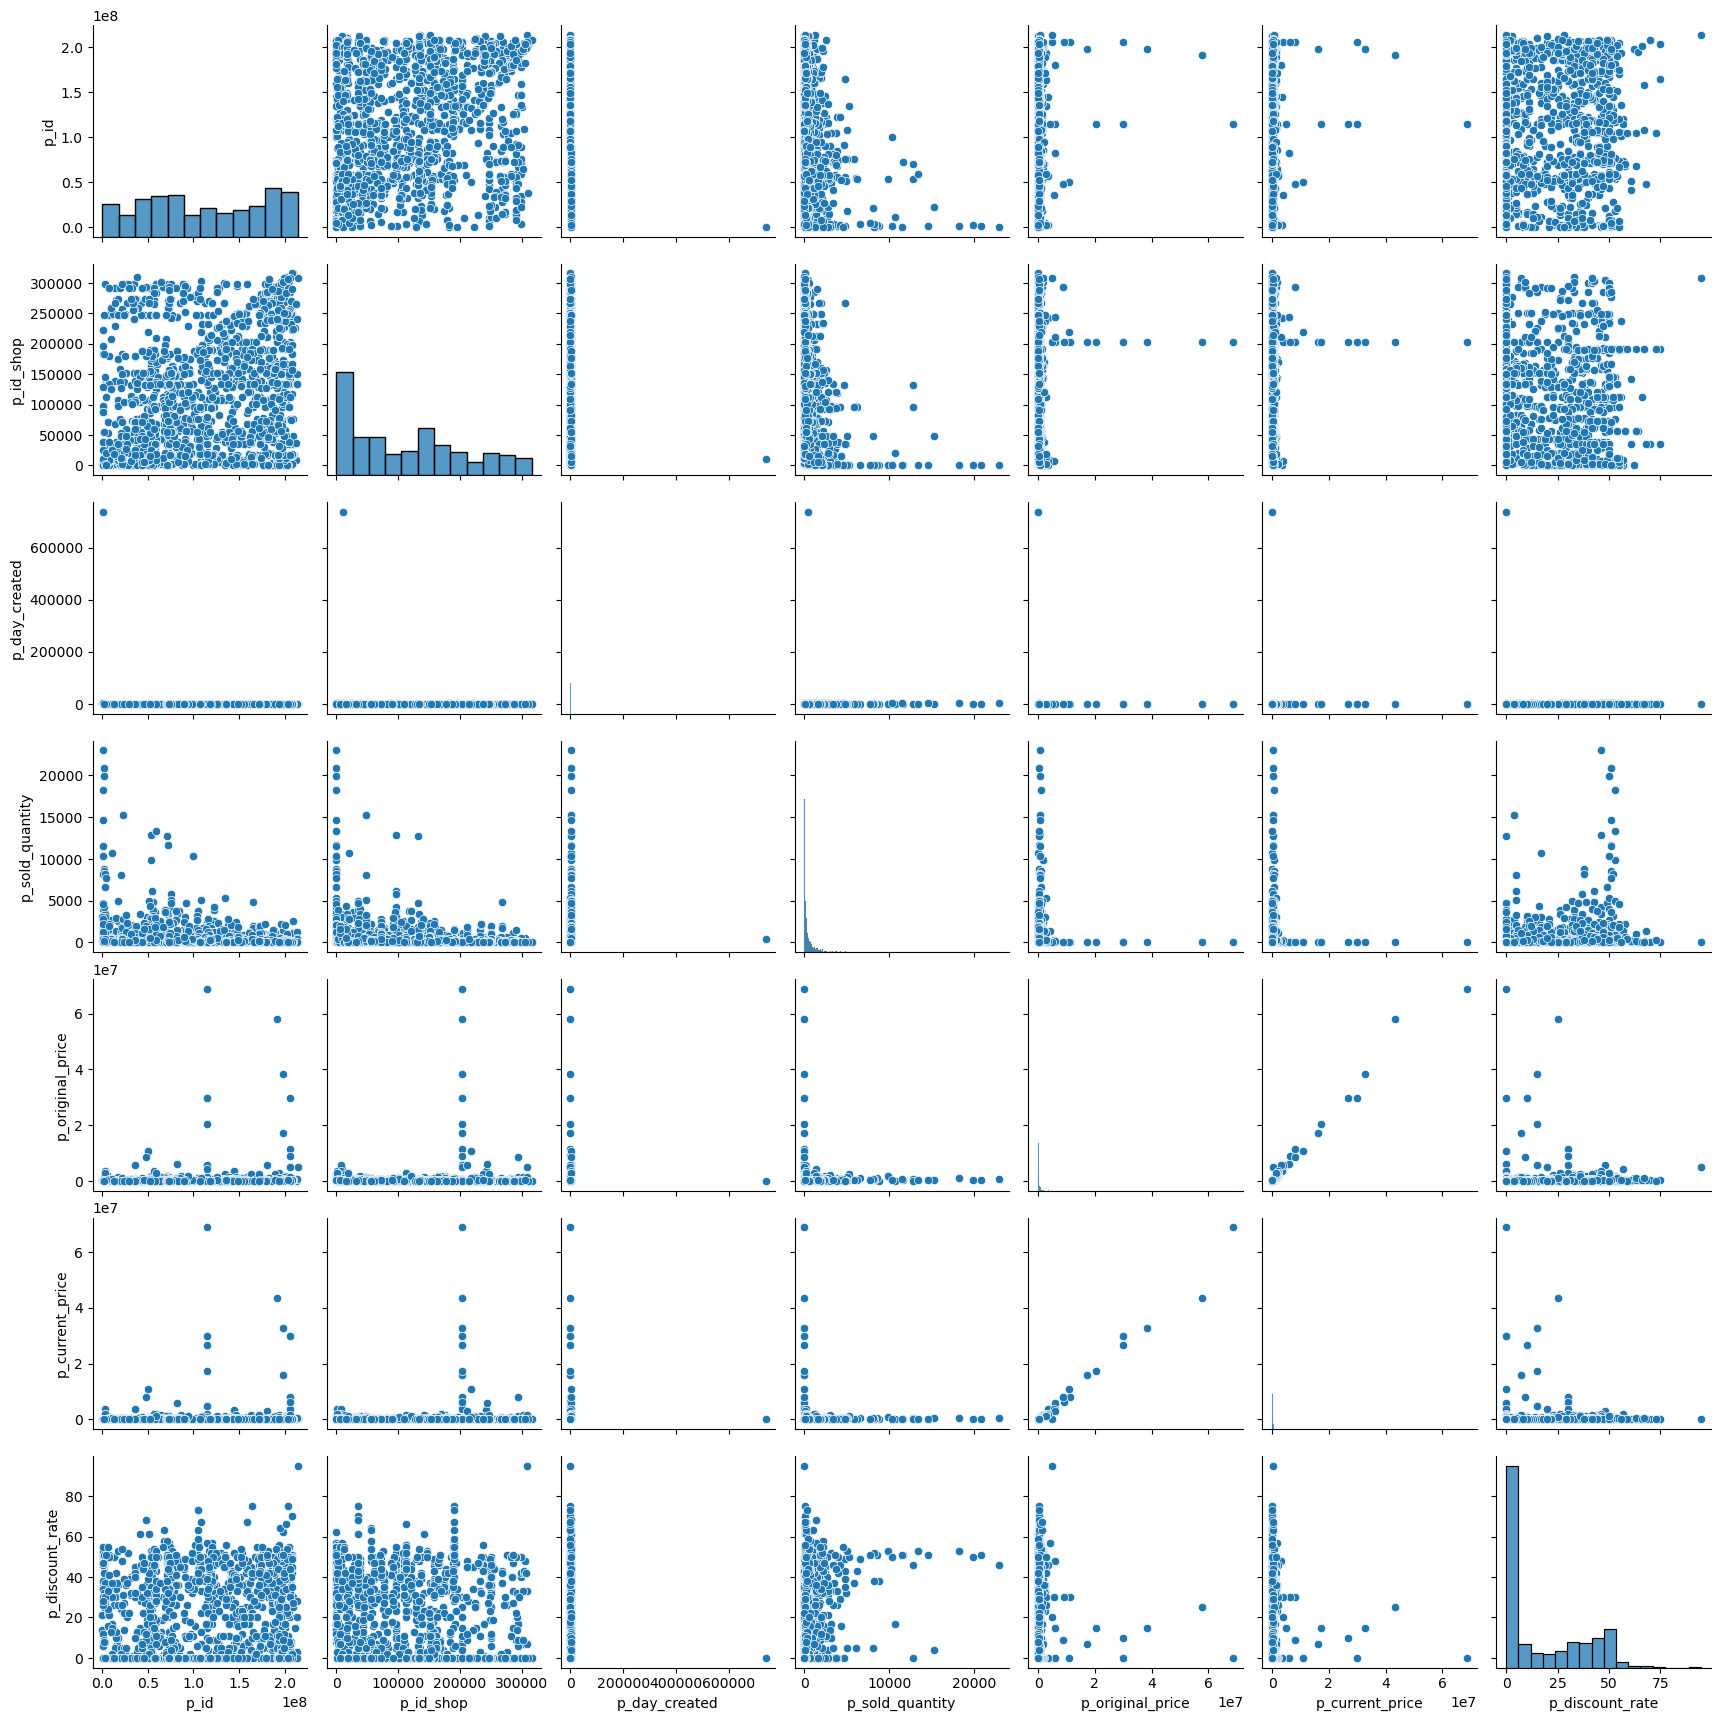

In [79]:
sns.pairplot(df_products)
plt.show()

In [68]:
df_products_copy = df_products.copy()

In [80]:
# use label encoder to encode the categorical variables
le = LabelEncoder()
cols_to_endcode = ['p_categories', 'p_brand']
df_products_copy[cols_to_endcode] = df_products_copy[cols_to_endcode].apply(le.fit_transform)
df_products_copy.head()

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,7,38510.0,JoyMall LocknLock Chính Hãng,155,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",84,96639.0,Parroti Store,198,974.0,12844,799000,429000,46
2,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,84,3340.0,Công ty TNHH TM Minh Gia Lợi,192,1372.0,938,209000,209000,0
3,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,7,1.0,Tiki Trading,155,593.0,10359,473000,235000,50
4,115092053,Bộ ga giường poly cotton LIDACO drap giường đ...,15,43482.0,Lidaco Official Store,145,529.0,2338,106000,89000,16


In [81]:
# scale the p_brand and p_categories
# scaler = StandardScaler()
# df_products_copy['p_brand'] = scaler.fit_transform(df_products_copy['p_brand'].values.reshape(-1,1))
# df_products_copy['p_categories'] = scaler.fit_transform(df_products_copy['p_categories'].values.reshape(-1, 1))
# df_products_copy['p_day_created'] = scaler.fit_transform(df_products_copy['p_day_created'].values.reshape(-1, 1))
# df_products_copy['p_original_price'] = scaler.fit_transform(df_products_copy['p_original_price'].values.reshape(-1, 1))
# df_products_copy['p_current_price'] = scaler.fit_transform(df_products_copy['p_current_price'].values.reshape(-1, 1))
# df_products_copy['p_discount_rate'] = scaler.fit_transform(df_products_copy['p_discount_rate'].values.reshape(-1, 1))


In [82]:
for col in df_products_copy:
   print(f'{col}: {df_products_copy[col].unique()}')

p_id: [ 83412126  53789448  13334313 ...  52049950 193777239 135442440]
p_name: ['Bình Giữ Nhiệt Lock&Lock Energetic One-Touch Tumbler LHC3249 - 550ML'
 'Bộ cây lau nhà tự vắt thông minh, chổi lau nhà 360 độ, lau sạch khô nhanh - Parroti Pro PR01'
 'Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa văn sắc xưa giả cổ' ...
 'Bộ 6 nĩa inox 304 DandiHome 2020 cao cấp, sang trọng, tinh tế'
 'Cưa cành cây gấp gọn cưa đa năng Nhật Bản'
 'Cưa Cầm Tay Lưỡi Thẳng Deli Chính Hãng - Lưỡi Cưa Kim Loại Chắc Chắn, Sắc Bén - Bao Bảo Vệ An Toàn - DL580924']
p_categories: [0.04605263 0.55263158 0.09868421 0.63815789 0.99342105 0.28947368
 0.34210526 0.75657895 0.35526316 0.25       0.71052632 0.23684211
 0.38815789 0.59210526 0.44736842 0.78947368 0.46052632 0.13815789
 0.68421053 0.19736842 0.         0.58552632 0.375      0.40789474
 0.69078947 0.92763158 0.59868421 0.86842105 0.02631579 0.15131579
 0.13157895 0.82894737 0.05921053 0.66447368 0.28289474 0.61842105
 0.83552632 0.90789474 0.92105263 0.776

In [72]:
canomical_data = df_products_copy.drop(['p_id','p_name', 'p_id_shop', 'p_shop_name', 'p_current_price'], axis=1)
canomical_data.head()

,p_categories,p_brand,p_day_created,p_sold_quantity,p_original_price,p_discount_rate
0,7,155,659.0,702,528000,49
1,84,198,974.0,12844,799000,46
2,84,192,1372.0,938,209000,0
3,7,155,593.0,10359,473000,50
4,15,145,529.0,2338,106000,16


In [83]:
# standardize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_products_copy['p_original_price'] = scaler.fit_transform(df_products_copy['p_original_price'].values.reshape(-1, 1))
# df_products_copy['p_brand'] = scaler.fit_transform(df_products_copy['p_brand'].values.reshape(-1, 1))
# df_products_copy['p_categories'] = scaler.fit_transform(df_products_copy['p_categories'].values.reshape(-1, 1))
# df_products_copy['p_current_price'] = scaler.fit_transform(df_products_copy['p_current_price'].values.reshape(-1, 1))
# df_products_copy = df_products_copy.drop(['p_id','p_name', 'p_id_shop', 'p_shop_name'], axis=1)
# df_products_copy

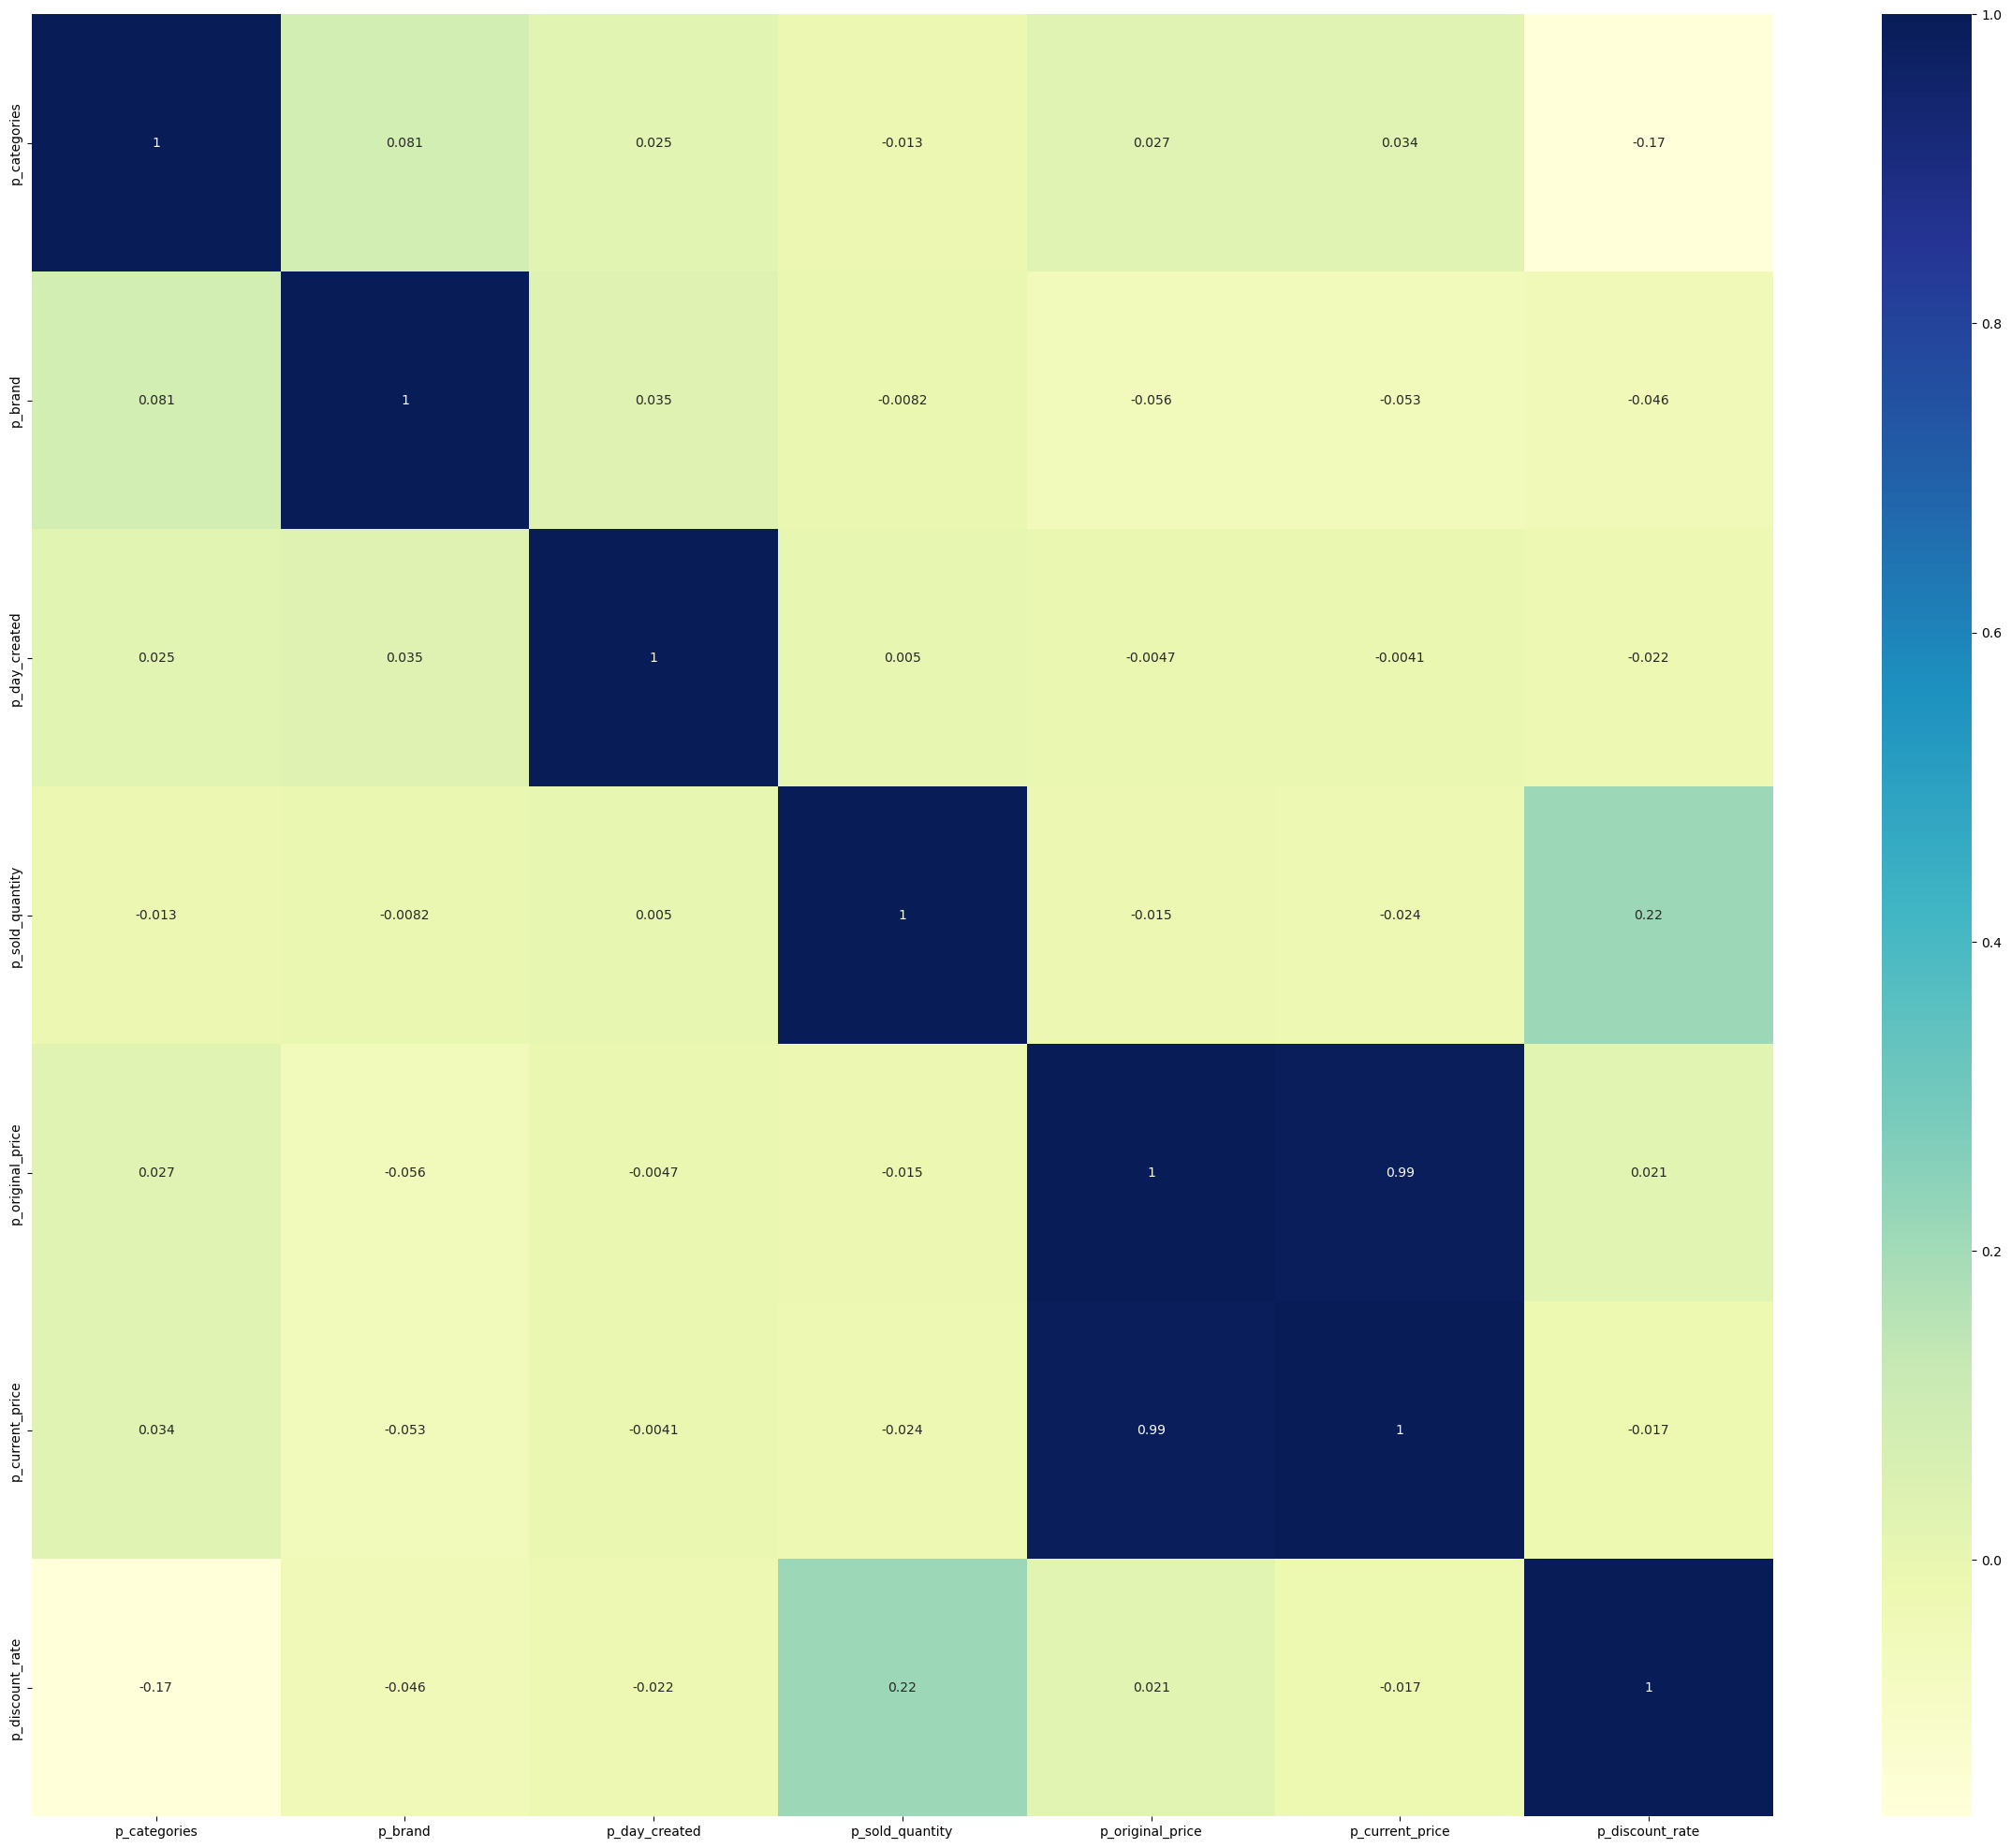

In [84]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(canomical_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [75]:
# write the canomical data to a csv file
canomical_data.to_csv('../../data/processed/canomical_data.csv', index=False)

### 4.3 Use model to calculate feature importance

In [85]:
corr = canomical_data.corr()
corr.sort_values(["p_sold_quantity"], ascending = False, inplace = True)
corr.p_sold_quantity.head(7)

p_sold_quantity     1.000000
p_discount_rate     0.216160
p_day_created       0.004964
p_brand            -0.008190
p_categories       -0.013411
p_original_price   -0.015140
Name: p_sold_quantity, dtype: float64

In [86]:
X = canomical_data.drop('p_sold_quantity', axis='columns')
y = testLabels = canomical_data.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

Feature: 0, Score: 0.06661
Feature: 1, Score: 0.12739
Feature: 2, Score: 0.32211
Feature: 3, Score: 0.19524
Feature: 4, Score: 0.28865


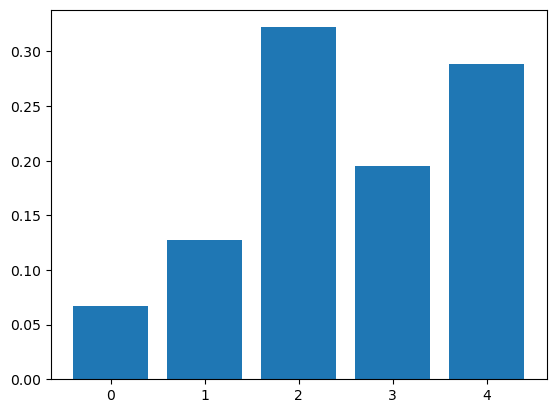

In [87]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
# model = log_reg(X_train, X_test, y_train, y_test) 
# model